In [1277]:
import pandas as pd
import yaml
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency

In [1278]:
#importamos el dataset desde el archivo yaml
with open ('../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [1279]:
#leemos el dataset
df = pd.read_csv(config['data']['df'])

In [1280]:
#vemos columnas y primeras filas
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1281]:
#comprobamos el tamaño del dataset
df.shape

(10000, 14)

In [1282]:
#vemos el tipo de datos de cada columna
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [1283]:
#comprobamos si hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [1284]:
#volvemos a comprobar si  hay valores nulos
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [1285]:
#comprobamos si hay duplicados en todo el dataframe
df.duplicated().sum()

0

In [1286]:
#no hay duplicados por CustomerId
df['CustomerId'].duplicated().sum()

0

In [1287]:
#convertimos la columna Exited a tipo objeto para el análisis EDA
df['Exited'] = df['Exited'].map({0: 'No', 1: 'Yes'})

In [1288]:
#eliminamos las columnas RowNumber y Surname del dataframe
columns_to_drop = ['RowNumber', 'Surname']
df = df.drop(columns=columns_to_drop)

In [1289]:
#agrupamos la edad en grupos hasta 30 adultos jóvenes, hasta 55 adultos de mediana edad y a partir de 55 adultos mayores
bins = [18, 30, 55, df['Age'].max()]
labels = ['Young adults', 'Middle-aged adults', 'Older adults']
df['Age_grouped'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [1290]:
#agrupamos el Balance en grupos 
bins = [0, 1, 50000, 100000, 150000, df['Balance'].max()]
labels = ['Zero', 'Low', 'Medium', 'Medium high', 'High']
df['Balance_grouped'] = pd.cut(df['Balance'], bins=bins, labels=labels, include_lowest=True)

In [1291]:
#agrupamos el CreditScore en alto, medio y bajo riesgo
bins = [300, 620, 700, df['CreditScore'].max()]
labels = ['High risk', 'Medium risk', 'Low risk']
df['CreditScore_grouped'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, include_lowest=True)

In [1292]:
#agrupamos el EstimatedSalary en alto, medio y bajo
bins = [0, 50000, 100000, df['EstimatedSalary'].max()]
labels = ['Low', 'Medium', 'High']
df['EstimatedSalary_grouped'] = pd.cut(df['EstimatedSalary'], bins=bins, labels=labels, include_lowest=True)

In [1293]:
#comprobamos cuántos valores hay para Gender
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

C:\Users\perez\AppData\Local\Temp\ipykernel_11508\4073409088.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\perez\anaconda3\envs\bank_churn_proyect\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



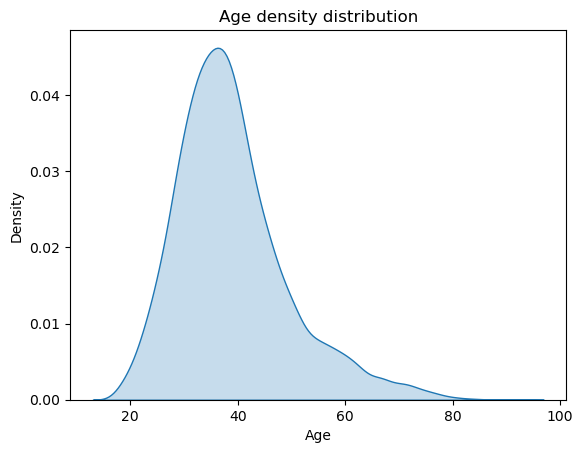

In [1294]:
# Crear el gráfico de densidad
sns.kdeplot(df['Age'], shade=True)

# Agregar títulos y etiquetas si es necesario
plt.title('Age density distribution')
plt.xlabel('Age')
plt.ylabel('Density')

# Mostrar el gráfico
plt.show()

C:\Users\perez\AppData\Local\Temp\ipykernel_11508\1459056069.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\perez\anaconda3\envs\bank_churn_proyect\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



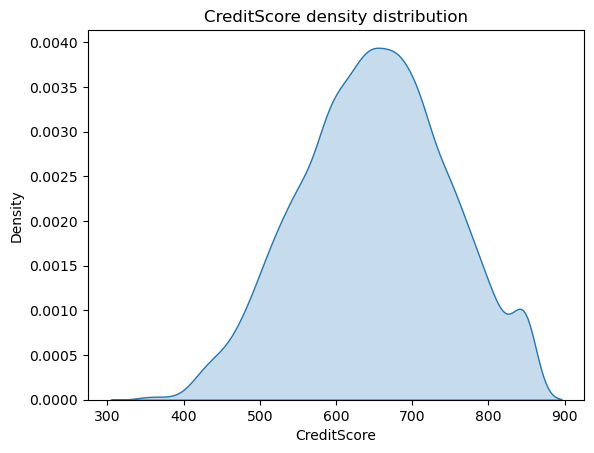

In [1295]:
# Crear el gráfico de densidad
sns.kdeplot(df['CreditScore'], shade=True)

# Agregar títulos y etiquetas si es necesario
plt.title('CreditScore density distribution')
plt.xlabel('CreditScore')
plt.ylabel('Density')

# Mostrar el gráfico
plt.show()

C:\Users\perez\AppData\Local\Temp\ipykernel_11508\2349476796.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\perez\anaconda3\envs\bank_churn_proyect\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



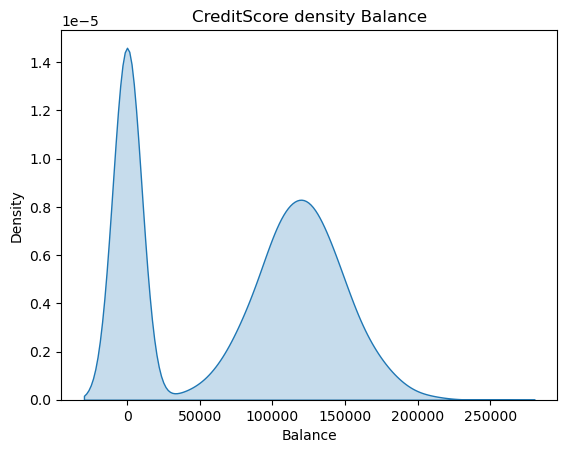

In [1296]:
# Crear el gráfico de densidad
sns.kdeplot(df['Balance'], shade=True)

# Agregar títulos y etiquetas si es necesario
plt.title('CreditScore density Balance')
plt.xlabel('Balance')
plt.ylabel('Density')

# Mostrar el gráfico
plt.show()

C:\Users\perez\AppData\Local\Temp\ipykernel_11508\4145034048.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\perez\anaconda3\envs\bank_churn_proyect\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



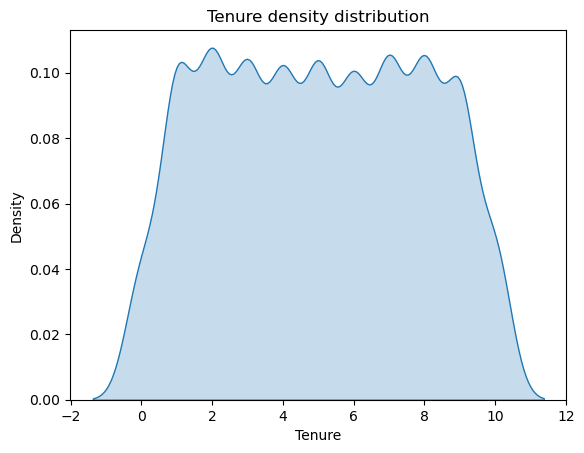

In [1297]:
# Crear el gráfico de densidad
sns.kdeplot(df['Tenure'], shade=True)

# Agregar títulos y etiquetas si es necesario
plt.title('Tenure density distribution')
plt.xlabel('Tenure')
plt.ylabel('Density')

# Mostrar el gráfico
plt.show()

C:\Users\perez\AppData\Local\Temp\ipykernel_11508\697732355.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\perez\anaconda3\envs\bank_churn_proyect\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



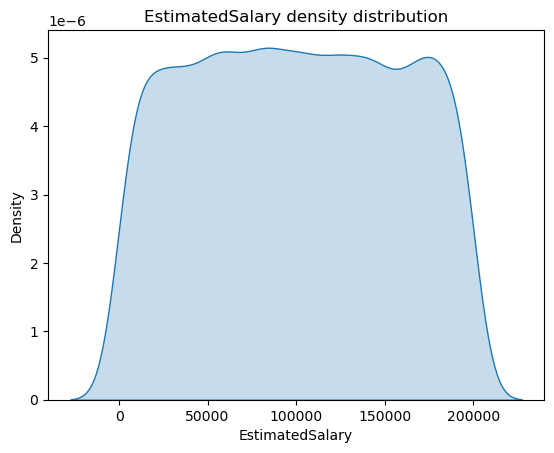

In [1298]:
# Crear el gráfico de densidad
sns.kdeplot(df['EstimatedSalary'], shade=True)

# Agregar títulos y etiquetas si es necesario
plt.title('EstimatedSalary density distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Density')

# Mostrar el gráfico
plt.show()

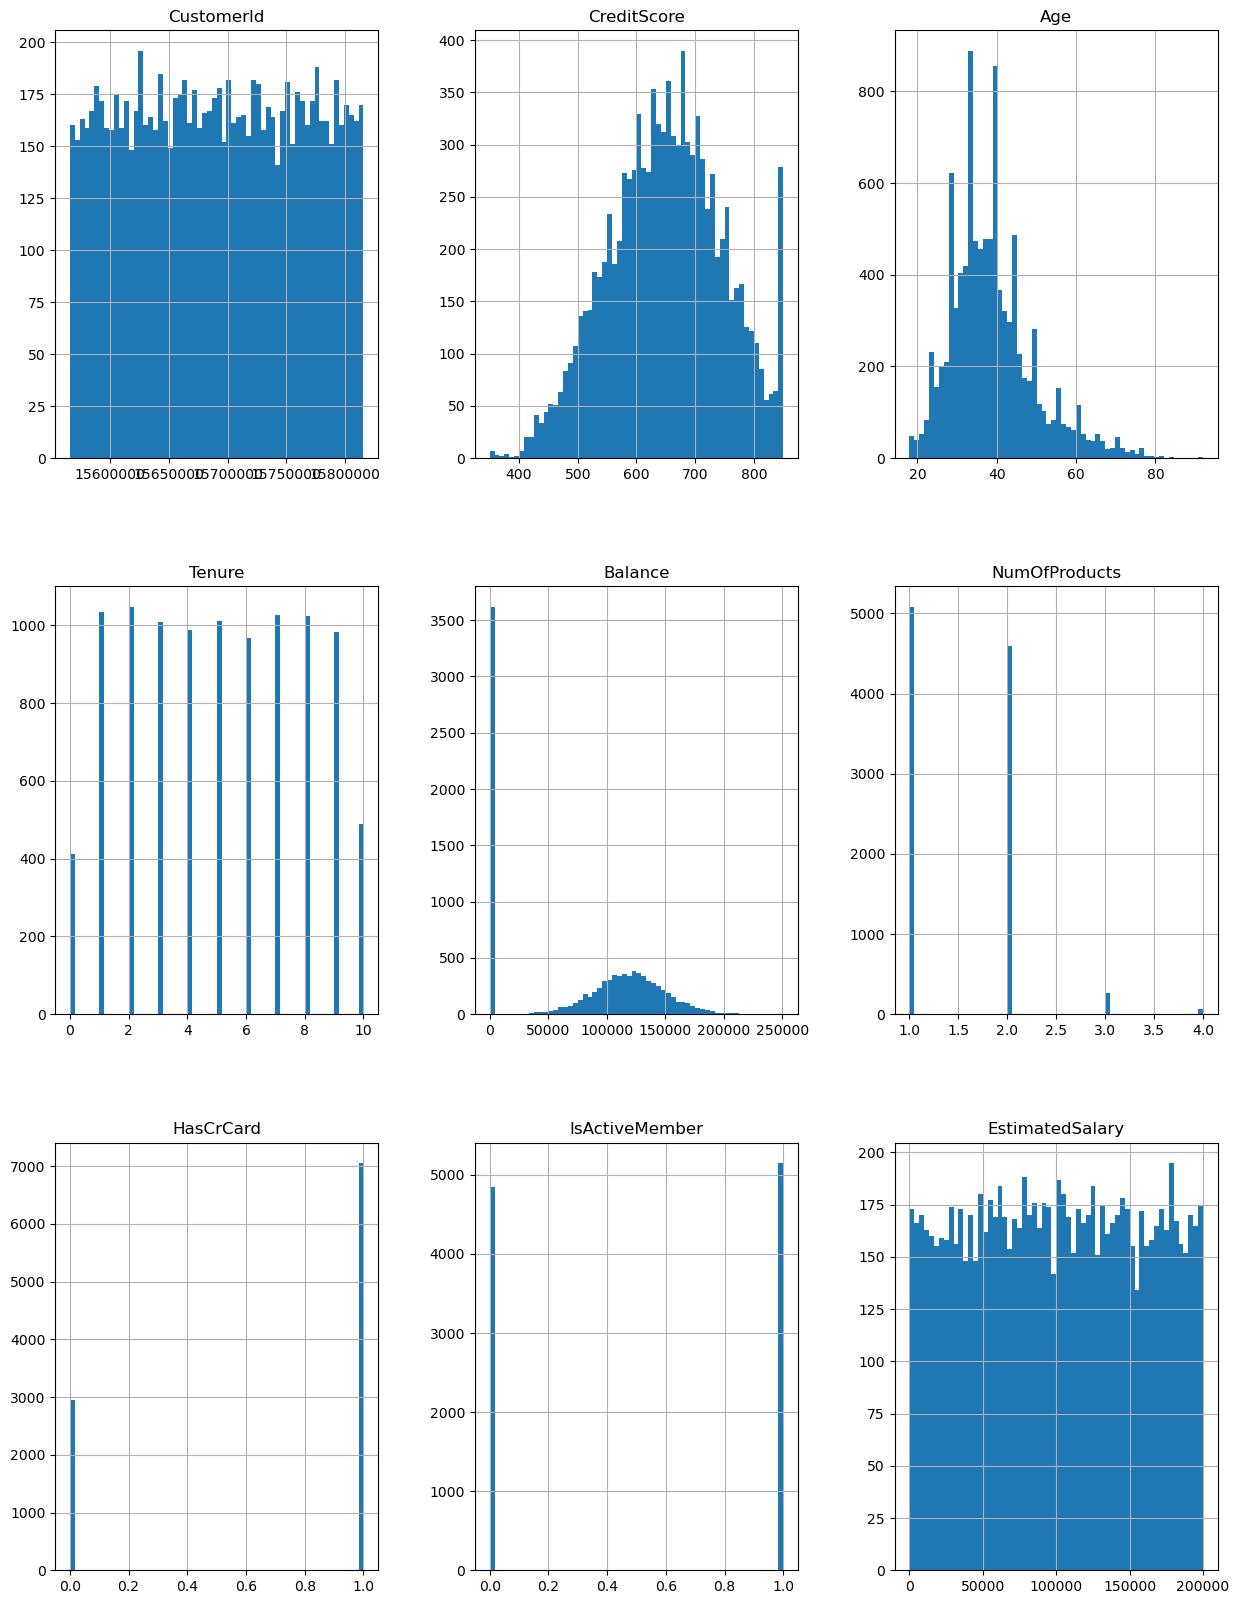

In [1299]:
#comprobamos la distribución de todas las variables numéricas
ax = df.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
for axis in ax.flatten():
    axis.ticklabel_format(style='plain', axis='x')

plt.show()

In [1300]:
#calculamos el porcentaje de clientes que siguen siéndolo y los que no
Exited_percent = (df['Exited'].value_counts(normalize=True) * 100).reset_index()

In [1301]:
Exited_percent

,Exited,proportion
0,No,79.63
1,Yes,20.37


In [1302]:
#creamos el gráfico circular para ver la distribución de clientes que han dejado de serlo y los que no
fig = px.pie(Exited_percent, values='proportion', names='Exited', title='Distribution of exited customers')
fig.show()

In [1303]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [1304]:
#agrupamos los datos por Género y Exited y contamos la cantidad de clientes en cada grupo
Gender_df = df.groupby(['Gender', 'Exited'])['CustomerId'].count().reset_index()

In [1305]:
#creamos un gráfico para ver la distribución de género entre los clientes que se fueron
fig = px.bar(Gender_df, x='Gender', y='CustomerId', color='Exited', title='Gender distribution among exited customers')
fig.show()

In [1306]:
#agrupamos los datos por Geography y Exited y contamos la cantidad de clientes en cada grupo
Age_df = df.groupby(['Age', 'Exited'])['CustomerId'].count().reset_index()

In [1307]:
#creamos un gráfico para ver la relación entre la edad y los clientes que se fueron
fig = px.scatter(Age_df, x='Age', y='CustomerId', color='Exited', title='Age distribution among exited customers')
fig.show()

In [1308]:
#agrupamos los datos por Geography y Exited y contamos la cantidad de clientes en cada grupo
Geography_df = df.groupby(['Geography', 'Exited'])['CustomerId'].count().reset_index()

In [1309]:
#creamos un gráfico para ver la distribución de geografía entre los clientes que se fueron
fig = px.bar(Geography_df, x='Geography', y='CustomerId', color='Exited', title='Geographic distribution among exited customers')
fig.show()

In [1310]:
#agrupamos los datos por Balance y Exited y contamos la cantidad de clientes en cada grupo
Balance_df = df.groupby(['Balance_grouped', 'Exited'])['CustomerId'].count().reset_index()

C:\Users\perez\AppData\Local\Temp\ipykernel_11508\2551477476.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [1311]:
#creamos un gráfico para ver la distribución de geografía entre los clientes que se fueron
fig = px.bar(Balance_df.rename(columns={'CustomerId':'Num_clients', 'Balance_grouped':'Balance'}), x='Balance', y='Num_clients', color='Exited', title='Balance distribution among exited customers',\
             hover_data=['Balance'])
fig.show()

In [1312]:
#agrupamos los datos por Balance y Exited y contamos la cantidad de clientes en cada grupo
CreditScore_df = df.groupby(['CreditScore_grouped', 'Exited'])['CustomerId'].count().reset_index()

C:\Users\perez\AppData\Local\Temp\ipykernel_11508\2828156295.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [1313]:
#creamos un gráfico para ver la distribución de geografía entre los clientes que se fueron
fig = px.bar(CreditScore_df, x='CreditScore_grouped', y='CustomerId', color='Exited', title='CreditScore distribution among exited customers')
fig.show()

In [1314]:
#agrupamos los datos por Balance y Exited y contamos la cantidad de clientes en cada grupo
Tenure_df = df.groupby(['Tenure', 'Exited'])['CustomerId'].count().reset_index()

In [1315]:
#creamos el gráfico
fig = px.bar(Tenure_df, x="Tenure", y="CustomerId", color="Exited", barmode='group')

#modificamos el título y etiquetas del gráfico
fig.update_layout(title="Tenure distribution among exited customers", xaxis_title='Tenure', yaxis_title='NumClients')

#mostramos el gráfico
fig.show()

In [1316]:
#agrupamos los datos por EstimatedSalary y Exited y contamos la cantidad de clientes en cada grupo
EstimatedSalary_df = df.groupby(['EstimatedSalary_grouped', 'Exited'])['CustomerId'].count().reset_index()

C:\Users\perez\AppData\Local\Temp\ipykernel_11508\1229949560.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [1317]:
#creamos un gráfico para ver la distribución de EstimatedSalary entre los clientes que se fueron
fig = px.bar(EstimatedSalary_df, x='EstimatedSalary_grouped', y='CustomerId', color='Exited', title='EstimatedSalary distribution among exited customers')
fig.show()

In [1318]:
#agrupamos los datos por NumOfProducts y Exited y contamos la cantidad de clientes en cada grupo
NumOfProducts_df = df.groupby(['NumOfProducts', 'Exited'])['CustomerId'].count().reset_index()

In [1319]:
#creamos el gráfico
fig = px.bar(NumOfProducts_df, x="NumOfProducts", y="CustomerId", color="Exited", barmode='group')

#modificamos el título y etiquetas del gráfico
fig.update_layout(title="NumOfProducts distribution among exited customers", xaxis_title='NumOfProducts', yaxis_title='NumClients')

#mostramos el gráfico
fig.show()

In [1320]:
#agrupamos los datos por HasCrCard y Exited y contamos la cantidad de clientes en cada grupo
HasCrCard_df = df.groupby(['HasCrCard', 'Exited'])['CustomerId'].count().reset_index()

In [1321]:
#creamos el gráfico
fig = px.bar(HasCrCard_df, x="HasCrCard", y="CustomerId", color="Exited", barmode='group')

#modificamos el título y etiquetas del gráfico
fig.update_layout(title="HasCrCard distribution among exited customers", xaxis_title='HasCrCard', yaxis_title='NumClients')

#mostramos el gráfico
fig.show()

In [1322]:
#agrupamos los datos por IsActiveMember y Exited y contamos la cantidad de clientes en cada grupo
IsActiveMember_df = df.groupby(['IsActiveMember', 'Exited'])['CustomerId'].count().reset_index()

In [1323]:
#creamos el gráfico
fig = px.bar(IsActiveMember_df, x="IsActiveMember", y="CustomerId", color="Exited", barmode='group')

#modificamos el título y etiquetas del gráfico
fig.update_layout(title="IsActiveMember distribution among exited customers", xaxis_title='IsActiveMember', yaxis_title='NumClients')

#mostramos el gráfico
fig.show()

In [1324]:
#devolvemos la columna Exited a tipo numérico para la predicción logarítmica
df['Exited'] = df['Exited'].map({'No': 0, 'Yes': 1})

In [1325]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_grouped,Balance_grouped,CreditScore_grouped,EstimatedSalary_grouped
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-aged adults,Zero,High risk,High
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-aged adults,Medium,High risk,High
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-aged adults,High,High risk,High
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Middle-aged adults,Zero,Medium risk,Medium
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-aged adults,Medium high,Low risk,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Middle-aged adults,Zero,Low risk,Medium
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Middle-aged adults,Medium,High risk,High
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Middle-aged adults,Zero,Low risk,Low
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Middle-aged adults,Medium,Low risk,Medium


In [1326]:
numeric_var = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']
categoric_var = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

c:\Users\perez\anaconda3\envs\bank_churn_proyect\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\perez\anaconda3\envs\bank_churn_proyect\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\perez\anaconda3\envs\bank_churn_proyect\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\perez\anaconda3\envs\bank_churn_proyect\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future ve

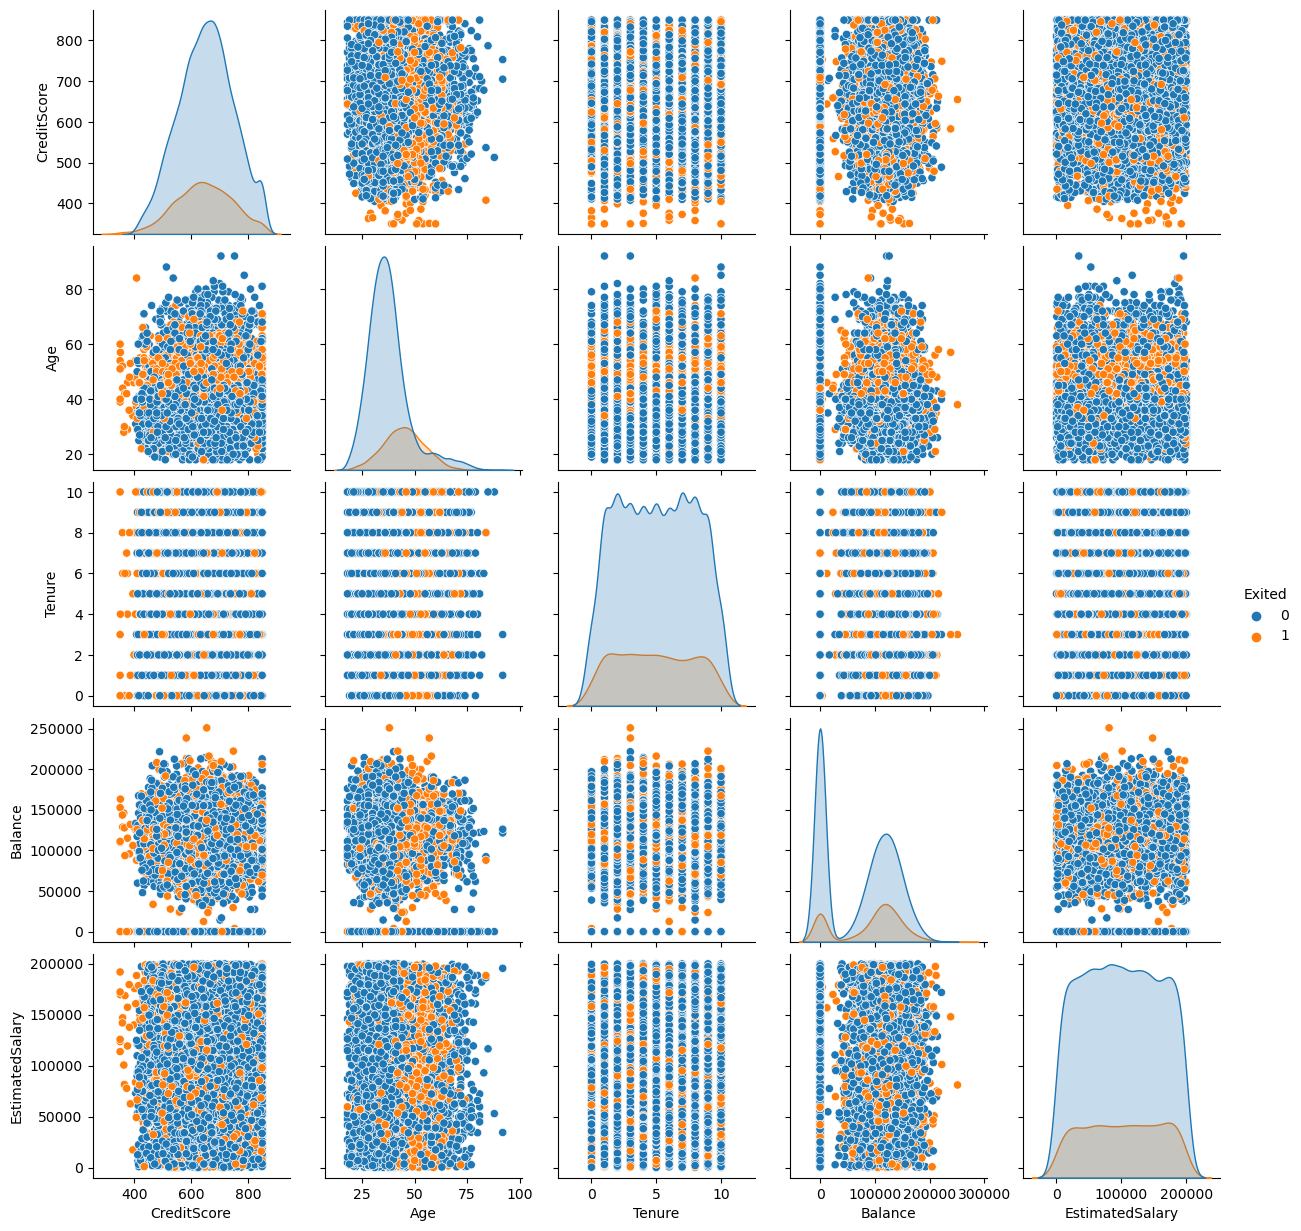

In [1327]:
sns.pairplot(df[numeric_var], hue='Exited')

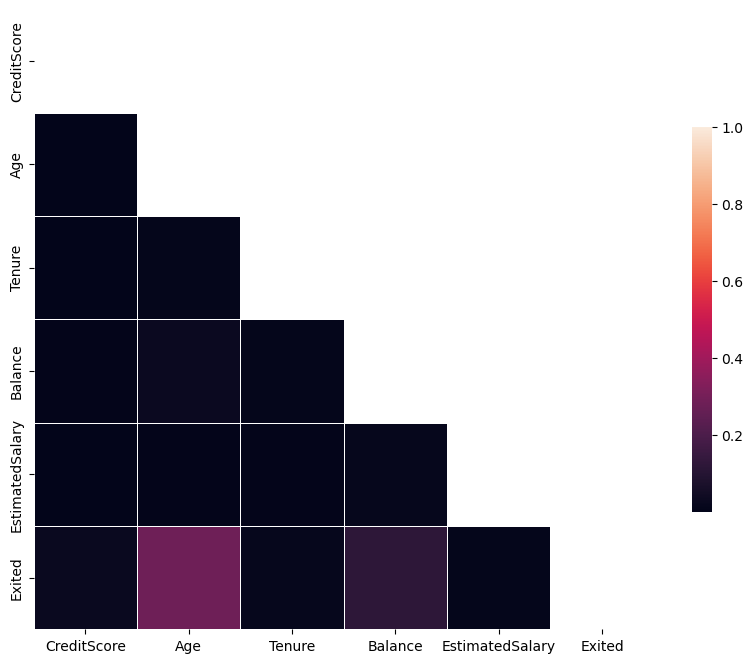

In [1328]:
corr=np.abs(df[numeric_var].corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=corr)

plt.show()

In [1329]:
# Filtrar solo las columnas categóricas
categorical_cols = df.select_dtypes(include='object')

In [1330]:
categorical_df = df[categoric_var]

In [1331]:
categorical_df

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1,1
1,Spain,Female,1,0,1,0
2,France,Female,3,1,0,1
3,France,Female,2,0,0,0
4,Spain,Female,1,1,1,0
...,...,...,...,...,...,...
9995,France,Male,2,1,0,0
9996,France,Male,1,1,1,0
9997,France,Female,1,0,1,1
9998,Germany,Male,2,1,0,1


In [1263]:
# Calcular pruebas de chi-cuadrado para todas las combinaciones de variables categóricas
results = {}
for col1 in categorical_df:
    for col2 in categorical_df:
        if col1 != col2:
            contingency_table = pd.crosstab(categorical_df[col1], categorical_df[col2])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            results[(col1, col2)] = {'chi2': chi2, 'p': p}
# Mostrar los resultados
for cols, result in results.items():
    print(f"Chi-squared test between {cols[0]} and {cols[1]}:")
    print(f"  Chi-squared: {result['chi2']}")
    print(f"  p-value: {result['p']}")
    print()

Chi-squared test between Geography and Gender:
  Chi-squared: 6.918159617700976
  p-value: 0.03145869671789379

Chi-squared test between Geography and NumOfProducts:
  Chi-squared: 49.24222661945511
  p-value: 6.668273981839838e-09

Chi-squared test between Geography and HasCrCard:
  Chi-squared: 2.235276666547224
  p-value: 0.32705126938205475

Chi-squared test between Geography and IsActiveMember:
  Chi-squared: 5.3046938050233425
  p-value: 0.070485595970645

Chi-squared test between Geography and Exited:
  Chi-squared: 301.25533682434536
  p-value: 3.8303176053541544e-66

Chi-squared test between Gender and Geography:
  Chi-squared: 6.918159617700976
  p-value: 0.03145869671789379

Chi-squared test between Gender and NumOfProducts:
  Chi-squared: 20.48710405619824
  p-value: 0.000134520925093053

Chi-squared test between Gender and HasCrCard:
  Chi-squared: 0.30756077917984026
  p-value: 0.5791808600631774

Chi-squared test between Gender and IsActiveMember:
  Chi-squared: 4.992271

In [1353]:
pd.DataFrame.from_dict(results, orient='index')

chi2             p
Geography      Gender             6.918160  3.145870e-02
               NumOfProducts     49.242227  6.668274e-09
               HasCrCard          2.235277  3.270513e-01
               IsActiveMember     5.304694  7.048560e-02
               Exited           301.255337  3.830318e-66
Gender         Geography          6.918160  3.145870e-02
               NumOfProducts     20.487104  1.345209e-04
               HasCrCard          0.307561  5.791809e-01
               IsActiveMember     4.992272  2.546076e-02
               Exited           112.918571  2.248210e-26
NumOfProducts  Geography         49.242227  6.668274e-09
               Gender            20.487104  1.345209e-04
               HasCrCard          0.376461  9.450611e-01
               IsActiveMember    17.194109  6.446571e-04
               Exited          1503.629362  0.000000e+00
HasCrCard      Geography          2.235277  3.270513e-01
               Gender             0.307561  5.791809e-01
               NumOfProducts      0.376461  9.450611e-01
               IsActiveMember     1.356328  2.441748e-01
               Exited             0.471338  4.923724e-01
IsActiveMember Geography          5.304694  7.048560e-02
               Gender             4.992272  2.546076e-02
               NumOfProducts     17.194109  6.446571e-04
               HasCrCard          1.356328  2.441748e-01
               Exited           242.985342  8.785858e-55
Exited         Geography        301.255337  3.830318e-66
               Gender           112.918571  2.248210e-26
               NumOfProducts   1503.629362  0.000000e+00
               HasCrCard          0.471338  4.923724e-01
               IsActiveMember   242.985342  8.785858e-55

In [1349]:
# Crear un dataframe de los resultados
chi_squared_df = pd.DataFrame(results.values(), index=results.keys(), columns=['Chi-Squared'])

In [1351]:
results.values()

dict_values([{'chi2': 6.918159617700976, 'p': 0.03145869671789379}, {'chi2': 49.24222661945511, 'p': 6.668273981839838e-09}, {'chi2': 2.235276666547224, 'p': 0.32705126938205475}, {'chi2': 5.3046938050233425, 'p': 0.070485595970645}, {'chi2': 301.25533682434536, 'p': 3.8303176053541544e-66}, {'chi2': 6.918159617700976, 'p': 0.03145869671789379}, {'chi2': 20.48710405619824, 'p': 0.000134520925093053}, {'chi2': 0.30756077917984026, 'p': 0.5791808600631774}, {'chi2': 4.992271810534194, 'p': 0.02546076070719629}, {'chi2': 112.91857062096116, 'p': 2.2482100097131755e-26}, {'chi2': 49.2422266194551, 'p': 6.668273981839851e-09}, {'chi2': 20.487104056198238, 'p': 0.0001345209250930533}, {'chi2': 0.37646056603010153, 'p': 0.9450610918614076}, {'chi2': 17.194109370672383, 'p': 0.0006446570779842891}, {'chi2': 1503.6293615070408, 'p': 0.0}, {'chi2': 2.235276666547224, 'p': 0.32705126938205475}, {'chi2': 0.30756077917984026, 'p': 0.5791808600631774}, {'chi2': 0.3764605660301016, 'p': 0.94506109186

In [1341]:
chi_squared_df

Chi-Squared
Geography      Gender                  NaN
               NumOfProducts           NaN
               HasCrCard               NaN
               IsActiveMember          NaN
               Exited                  NaN
Gender         Geography               NaN
               NumOfProducts           NaN
               HasCrCard               NaN
               IsActiveMember          NaN
               Exited                  NaN
NumOfProducts  Geography               NaN
               Gender                  NaN
               HasCrCard               NaN
               IsActiveMember          NaN
               Exited                  NaN
HasCrCard      Geography               NaN
               Gender                  NaN
               NumOfProducts           NaN
               IsActiveMember          NaN
               Exited                  NaN
IsActiveMember Geography               NaN
               Gender                  NaN
               NumOfProducts           NaN
               HasCrCard               NaN
               Exited                  NaN
Exited         Geography               NaN
               Gender                  NaN
               NumOfProducts           NaN
               HasCrCard               NaN
               IsActiveMember          NaN

In [1358]:
# Reorganizar los datos en una matriz cuadrada
chi_squared_matrix = pd.DataFrame.from_dict(results, orient='index').reset_index()

In [1360]:
chi_squared_matrix

,level_0,level_1,chi2,p
0,Geography,Gender,6.918160,3.145870e-02
1,Geography,NumOfProducts,49.242227,6.668274e-09
2,Geography,HasCrCard,2.235277,3.270513e-01
3,Geography,IsActiveMember,5.304694,7.048560e-02
4,Geography,Exited,301.255337,3.830318e-66
5,Gender,Geography,6.918160,3.145870e-02
6,Gender,NumOfProducts,20.487104,1.345209e-04
7,Gender,HasCrCard,0.307561,5.791809e-01
8,Gender,IsActiveMember,4.992272,2.546076e-02
9,Gender,Exited,112.918571,2.248210e-26


c:\Users\perez\anaconda3\envs\bank_churn_proyect\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



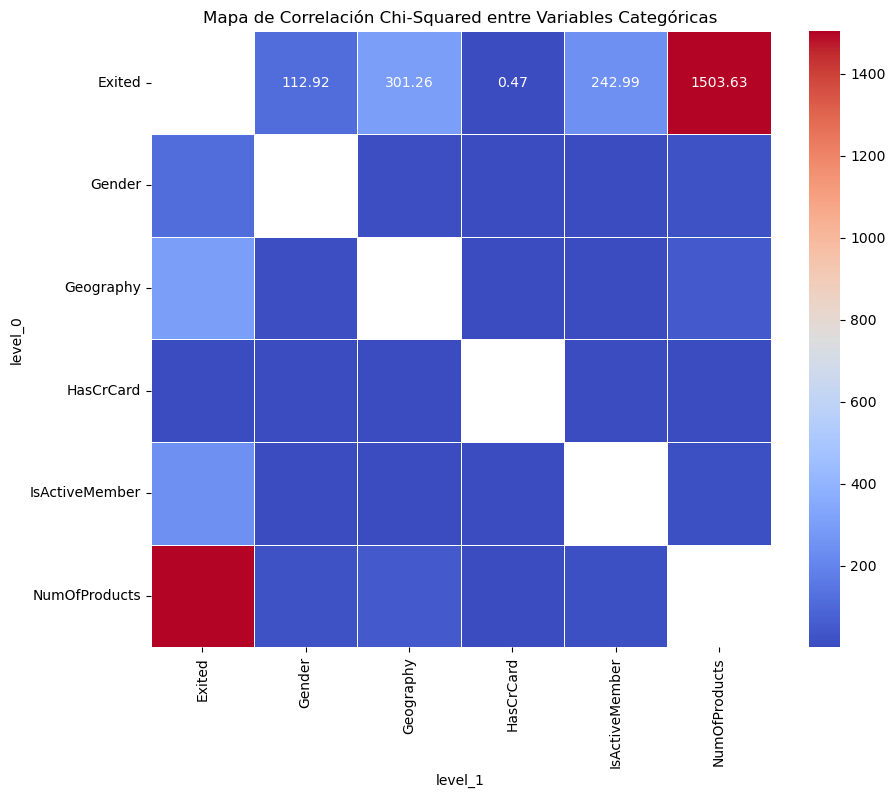

In [1361]:
# Crear un mapa de calor con seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(chi_squared_matrix.pivot(index='level_0', columns='level_1', values='chi2'),
                      annot=True,
                      cmap='coolwarm',
                      linewidths=0.5,
                      fmt=".2f")
heatmap.set_title('Mapa de Correlación Chi-Squared entre Variables Categóricas')
plt.show()